# Import Libraries and Data

In [1]:
#pip install pyspark

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import datetime, warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import calendar

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [3]:
# to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Read in the airports data
# airports = spark.read.csv('airports.csv', inferSchema = True, header = True)

# Show the data
# airports.show(5)

In [5]:
df_1991 = pd.read_csv('1991.csv', encoding='ISO-8859-1')

print('Shape of the year 1991 dataset:', df_1991.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
df_1991_info=pd.DataFrame(df_1991.dtypes).T.rename(index={0:'column type'})
df_1991_info=df_1991_info.append(pd.DataFrame(df_1991.isnull().sum()).T.rename(index={0:'null values (nb)'}))
df_1991_info=df_1991_info.append(pd.DataFrame(df_1991.isnull().sum()/df_1991.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
df_1991_info

Shape of the year 1991 dataset: (5076925, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
column type,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,43505,0,56090,0,0,0,5076925,56090,0,5076925,56090,43505,0,0,26261,5076925,5076925,0,5076925,0,5076925,5076925,5076925,5076925,5076925
null values (%),0.0,0.0,0.0,0.0,0.856916,0.0,1.104803,0.0,0.0,0.0,100.0,1.104803,0.0,100.0,1.104803,0.856916,0.0,0.0,0.517262,100.0,100.0,0.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


In [6]:
df_2001 = pd.read_csv('2001.csv', encoding='ISO-8859-1')

print('Shape of the year 2001 dataset:', df_2001.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
df_2001_info=pd.DataFrame(df_2001.dtypes).T.rename(index={0:'column type'})
df_2001_info=df_2001_info.append(pd.DataFrame(df_2001.isnull().sum()).T.rename(index={0:'null values (nb)'}))
df_2001_info=df_2001_info.append(pd.DataFrame(df_2001.isnull().sum()/df_2001.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
df_2001_info

Shape of the year 2001 dataset: (5967780, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
column type,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,int64,float64,float64,float64,object,object,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,231198,0,244107,0,0,0,0,244107,0,244107,244107,231198,0,0,0,0,0,0,5967780,0,5967780,5967780,5967780,5967780,5967780
null values (%),0.0,0.0,0.0,0.0,3.874104,0.0,4.090416,0.0,0.0,0.0,0.0,4.090416,0.0,4.090416,4.090416,3.874104,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0


In [7]:
airports = pd.read_csv('airports.csv', encoding='ISO-8859-1')
airports.head(5)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [8]:
airlines_names = pd.read_csv('carriers.csv')
airlines_names.replace({'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)': 'US Airways Inc.',
                 'America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)': 'America West Airlines Inc.',
                 'Pan American World Airways (1)': 'Pan American World Airways',
                 'Midway Airlines Inc. (1)': 'Midway Airlines Inc.'}, inplace=True)
airlines_names.head(5)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


# Cleaning and Data Preprocessing

In [9]:
"""""
# Adding the date field
df_1991.rename(columns={"DayofMonth": "Day"}, inplace=True)
df_2001.rename(columns={"DayofMonth": "Day"}, inplace=True)
df_1991['Date'] = pd.to_datetime(df_1991[['Year', 'Month', 'Day']])
df_2001['Date'] = pd.to_datetime(df_2001[['Year', 'Month', 'Day']])
"""""

'""\n# Adding the date field\ndf_1991.rename(columns={"DayofMonth": "Day"}, inplace=True)\ndf_2001.rename(columns={"DayofMonth": "Day"}, inplace=True)\ndf_1991[\'Date\'] = pd.to_datetime(df_1991[[\'Year\', \'Month\', \'Day\']])\ndf_2001[\'Date\'] = pd.to_datetime(df_2001[[\'Year\', \'Month\', \'Day\']])\n'

In [10]:
#df_1991.head(5)

In [11]:
# Dropping unnecessary columns
variables_to_remove = ['TaxiOut', 'TaxiIn', 'NASDelay', 'SecurityDelay',
                       'CarrierDelay', 'LateAircraftDelay', 'WeatherDelay', 'Diverted', 'Cancelled', 'FlightNum',
                       'TailNum', 'AirTime', 'CancellationCode']

df_1991.drop(variables_to_remove, axis=1, inplace = True)
df_2001.drop(variables_to_remove, axis=1, inplace = True)

In [12]:
# Finding missing values
missing_df_1991 = df_1991.isnull().sum(axis=0).reset_index()
missing_df_1991.columns = ['variable', 'missing values']
missing_df_1991['filling factor (%)']=(df_1991.shape[0]-missing_df_1991['missing values'])/df_1991.shape[0]*100
missing_df_1991.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrTime,56090,98.895197
1,ActualElapsedTime,56090,98.895197
2,ArrDelay,56090,98.895197
3,DepTime,43505,99.143084
4,DepDelay,43505,99.143084
5,Distance,26261,99.482738
6,Year,0,100.000000
7,Month,0,100.000000
8,DayofMonth,0,100.000000
9,DayOfWeek,0,100.000000


In [13]:
# Finding missing values
missing_df_2001 = df_2001.isnull().sum(axis=0).reset_index()
missing_df_2001.columns = ['variable', 'missing values']
missing_df_2001['filling factor (%)']=(df_2001.shape[0]-missing_df_2001['missing values'])/df_2001.shape[0]*100
missing_df_2001.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrTime,244107,95.909584
1,ActualElapsedTime,244107,95.909584
2,ArrDelay,244107,95.909584
3,DepTime,231198,96.125896
4,DepDelay,231198,96.125896
5,Year,0,100.000000
6,Month,0,100.000000
7,DayofMonth,0,100.000000
8,DayOfWeek,0,100.000000
9,CRSDepTime,0,100.000000


In [14]:
df_1991.dropna(inplace = True)
df_2001.dropna(inplace = True)

In [15]:
# Getting carriers from the dataset
df_1991_carrier = pd.merge(df_1991, airlines_names, left_on='UniqueCarrier', right_on='Code', how='inner')
df_2001_carrier = pd.merge(df_2001, airlines_names, left_on='UniqueCarrier', right_on='Code', how='inner')
df_carriers = pd.concat([df_1991_carrier, df_2001_carrier])
df_carriers = df_carriers[['Code', 'Description']]

df_1991_carrier = df_1991_carrier[['Code', 'Description']]
df_2001_carrier = df_2001_carrier[['Code', 'Description']]

df_1991_carrier = df_1991_carrier.drop_duplicates()
df_2001_carrier = df_2001_carrier.drop_duplicates()

# Remove duplicates
df_carriers = df_carriers.drop_duplicates()
df_carriers

,Code,Description
0,US,US Airways Inc.
894960,WN,Southwest Airlines Co.
1254617,NW,Northwest Airlines Inc.
1710450,PA (1),Pan American World Airways
1774097,TW,Trans World Airways LLC
2001600,UA,United Air Lines Inc.
2619165,DL,Delta Air Lines Inc.
3483896,HP,America West Airlines Inc.
3699351,ML (1),Midway Airlines Inc.
3768470,AA,American Airlines Inc.


In [16]:
# Storing the carriers dataframe into a dictionary
airlines_names_dict = df_carriers.set_index('Code')['Description'].to_dict()
airlines_names_dict

{'US': 'US Airways Inc.',
 'WN': 'Southwest Airlines Co.',
 'NW': 'Northwest Airlines Inc.',
 'PA (1)': 'Pan American World Airways',
 'TW': 'Trans World Airways LLC',
 'UA': 'United Air Lines Inc.',
 'DL': 'Delta Air Lines Inc.',
 'HP': 'America West Airlines Inc.',
 'ML (1)': 'Midway Airlines Inc.',
 'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'CO': 'Continental Air Lines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'AQ': 'Aloha Airlines Inc.'}

In [17]:
# Storing the carriers dataframe into a dictionary
airlines_names_1991 = df_1991_carrier.set_index('Code')['Description'].to_dict()
airlines_names_1991

{'US': 'US Airways Inc.',
 'WN': 'Southwest Airlines Co.',
 'NW': 'Northwest Airlines Inc.',
 'PA (1)': 'Pan American World Airways',
 'TW': 'Trans World Airways LLC',
 'UA': 'United Air Lines Inc.',
 'DL': 'Delta Air Lines Inc.',
 'HP': 'America West Airlines Inc.',
 'ML (1)': 'Midway Airlines Inc.',
 'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'CO': 'Continental Air Lines Inc.'}

In [18]:
# Storing the carriers dataframe into a dictionary
airlines_names_2001 = df_2001_carrier.set_index('Code')['Description'].to_dict()
airlines_names_2001

{'US': 'US Airways Inc.',
 'WN': 'Southwest Airlines Co.',
 'NW': 'Northwest Airlines Inc.',
 'TW': 'Trans World Airways LLC',
 'UA': 'United Air Lines Inc.',
 'DL': 'Delta Air Lines Inc.',
 'HP': 'America West Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'AA': 'American Airlines Inc.',
 'AQ': 'Aloha Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'CO': 'Continental Air Lines Inc.'}

In [19]:
df_1991.loc[df_1991['ArrDelay'] <= 0, 'OnTime'] = 1
df_1991.loc[df_1991['ArrDelay'] > 0, 'OnTime'] = 0

df_2001.loc[df_2001['ArrDelay'] <= 0, 'OnTime'] = 1
df_2001.loc[df_2001['ArrDelay'] > 0, 'OnTime'] = 0

In [20]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'UniqueCarrier': group.name, 'AirlineName': airlines_names.loc[airlines_names['Code'] == group.name, 'Description'].iloc[0] ,
            'TotalCount': group.count(), 'OnTimeCount': group.sum(), 'OnTimePerc': round(group.mean() * 100, 2)}

In [21]:
# Creation of a dataframe with statitical infos on each airline for the year 1991
df_OnTimeCarriers_1991 = df_1991['OnTime'].groupby(df_1991['UniqueCarrier']).apply(get_stats).unstack()
df_OnTimeCarriers_1991 = df_OnTimeCarriers_1991.sort_values('OnTimeCount')
df_OnTimeCarriers_1991['Year'] = 1991
df_OnTimeCarriers_1991

,UniqueCarrier,AirlineName,TotalCount,OnTimeCount,OnTimePerc,Year
UniqueCarrier,,,,,,
ML (1),ML (1),Midway Airlines Inc.,69119,39588.0,57.28,1991
PA (1),PA (1),Pan American World Airways,63647,39688.0,62.36,1991
AS,AS,Alaska Airlines Inc.,92349,48275.0,52.27,1991
HP,HP,America West Airlines Inc.,215455,103383.0,47.98,1991
TW,TW,Trans World Airways LLC,227503,114887.0,50.5,1991
WN,WN,Southwest Airlines Co.,359657,200048.0,55.62,1991
CO,CO,Continental Air Lines Inc.,418838,218104.0,52.07,1991
NW,NW,Northwest Airlines Inc.,455833,276484.0,60.65,1991
UA,UA,United Air Lines Inc.,617565,309402.0,50.1,1991


In [22]:
# Creation of a dataframe with statitical infos on each airline for the year 2001
df_OnTimeCarriers_2001 = df_2001['OnTime'].groupby(df_2001['UniqueCarrier']).apply(get_stats).unstack()
df_OnTimeCarriers_2001 = df_OnTimeCarriers_2001.sort_values('OnTimeCount')
df_OnTimeCarriers_2001['Year'] = 2001
df_OnTimeCarriers_2001

,UniqueCarrier,AirlineName,TotalCount,OnTimeCount,OnTimePerc,Year
UniqueCarrier,,,,,,
AQ,AQ,Aloha Airlines Inc.,52308,25404.0,48.57,2001
AS,AS,Alaska Airlines Inc.,150162,60553.0,40.33,2001
HP,HP,America West Airlines Inc.,203300,99144.0,48.77,2001
TW,TW,Trans World Airways LLC,238532,138111.0,57.9,2001
CO,CO,Continental Air Lines Inc.,365387,225411.0,61.69,2001
MQ,MQ,American Eagle Airlines Inc.,453272,245373.0,54.13,2001
NW,NW,Northwest Airlines Inc.,514102,314536.0,61.18,2001
UA,UA,United Air Lines Inc.,668812,368834.0,55.15,2001
AA,AA,American Airlines Inc.,682859,394348.0,57.75,2001


In [23]:
df_OnTimeCarriers = pd.concat([df_OnTimeCarriers_1991, df_OnTimeCarriers_2001])
df_OnTimeCarriers

,UniqueCarrier,AirlineName,TotalCount,OnTimeCount,OnTimePerc,Year
UniqueCarrier,,,,,,
ML (1),ML (1),Midway Airlines Inc.,69119,39588.0,57.28,1991
PA (1),PA (1),Pan American World Airways,63647,39688.0,62.36,1991
AS,AS,Alaska Airlines Inc.,92349,48275.0,52.27,1991
HP,HP,America West Airlines Inc.,215455,103383.0,47.98,1991
TW,TW,Trans World Airways LLC,227503,114887.0,50.5,1991
WN,WN,Southwest Airlines Co.,359657,200048.0,55.62,1991
CO,CO,Continental Air Lines Inc.,418838,218104.0,52.07,1991
NW,NW,Northwest Airlines Inc.,455833,276484.0,60.65,1991
UA,UA,United Air Lines Inc.,617565,309402.0,50.1,1991


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


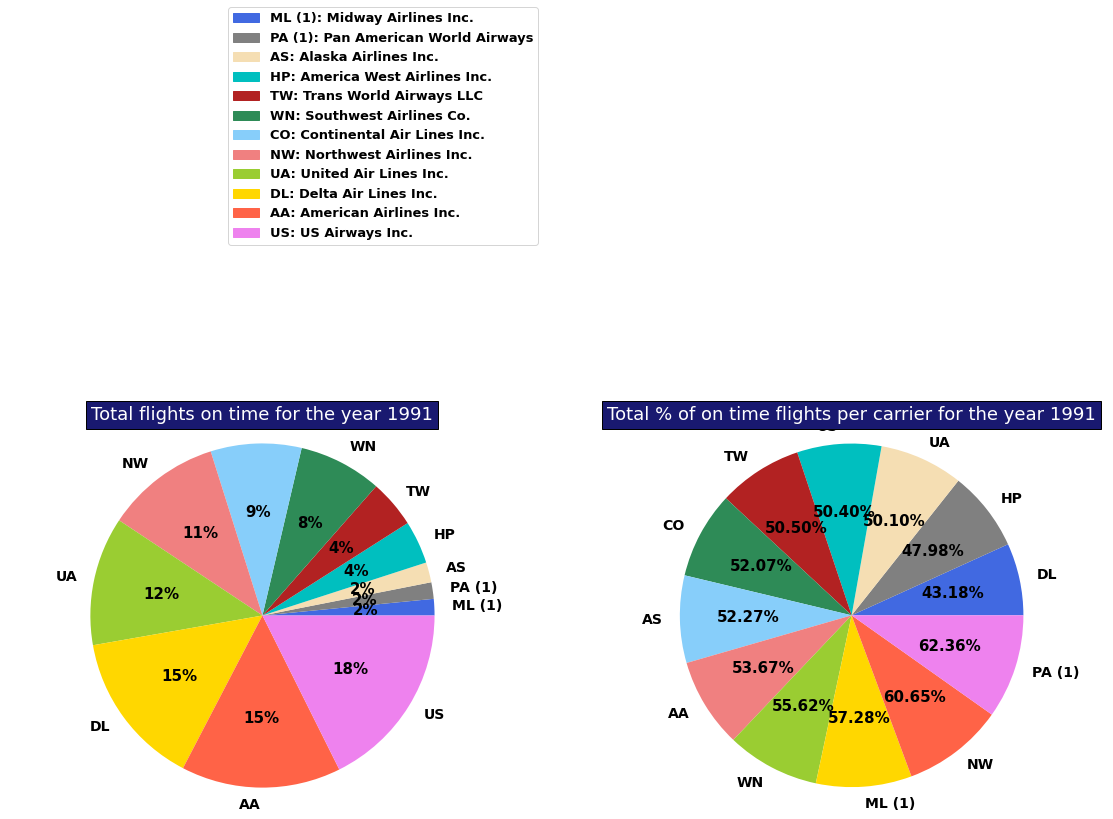

In [24]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)

#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df_1991_2 = df_1991.loc[:, ['UniqueCarrier', 'OnTime']]
df_1991_2['UniqueCarrier'] = df_1991_2['UniqueCarrier'].replace(airlines_names_1991)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
#ax3=fig.add_subplot(gs[1,:]) 

#------------------------------
# Pie chart nº1:Total On Time flights
#------------------------------
df_OnTimeCarriers_1991 = df_OnTimeCarriers_1991.sort_values('OnTimeCount')
labels = [s for s in  df_OnTimeCarriers_1991.index]
sizes  = df_OnTimeCarriers_1991['OnTimeCount'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(airlines_names_1991))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(airlines_names_1991)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('Total flights on time for the year 1991', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(airlines_names_1991)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = df_OnTimeCarriers_1991.index[i] + ': ' + airlines_names_1991[df_OnTimeCarriers_1991.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

#----------------------------------------
# Pie chart nº2: Total Percentage of On Time flights
#----------------------------------------
df_OnTimeCarriers_1991 = df_OnTimeCarriers_1991.sort_values('OnTimePerc')
labels = [s for s in  df_OnTimeCarriers_1991.index]
sizes  = df_OnTimeCarriers_1991['OnTimePerc'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(airlines_names_1991))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.2f}%'.format(p * sum(sizes) / 100))
for i in range(len(airlines_names_1991)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Total % of on time flights per carrier for the year 1991', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)


#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________

"""""
ax3 = sns.stripplot(y="UniqueCarrier", x="OnTimePerc", size = 4, palette = colors,
                    data=df_OnTimeCarriers_1991, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
#ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
 #                        for x in ax3.get_xticks()])
plt.xlabel('On time flights per carrier for the year 1991', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
"""""
plt.tight_layout(w_pad=3) 

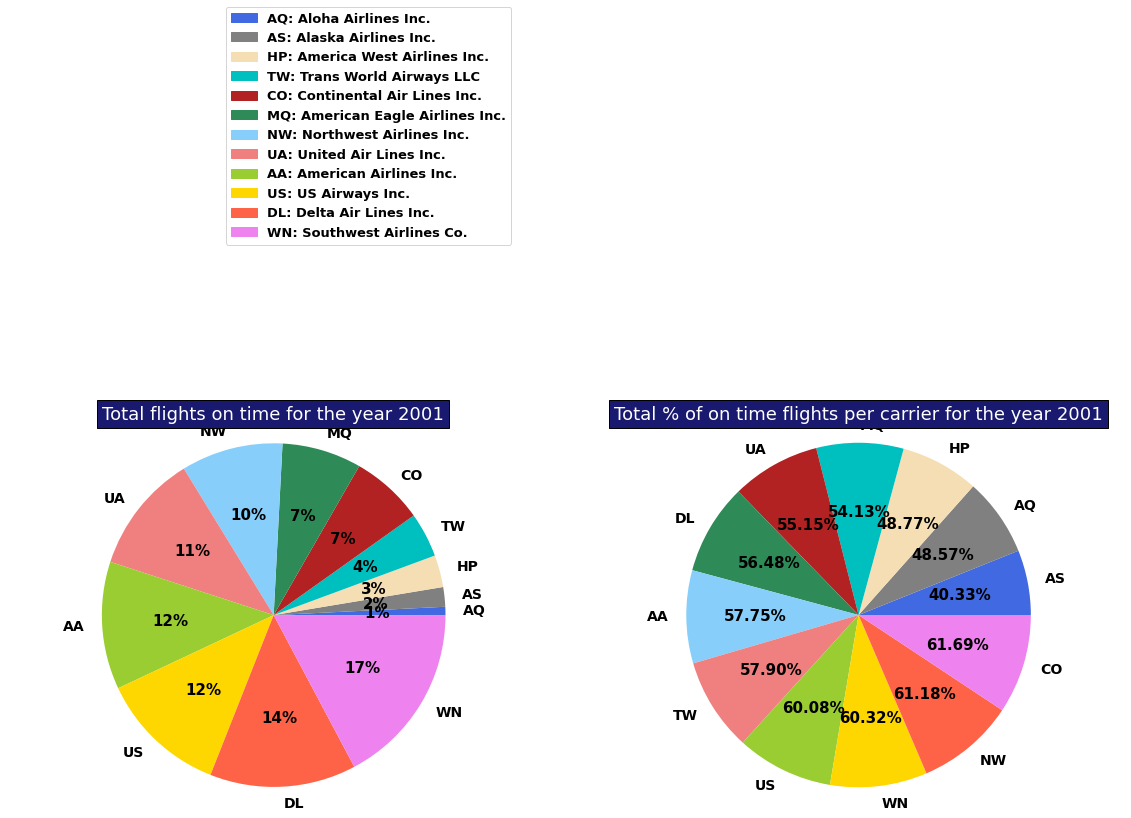

In [25]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)

#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df_2001_2 = df_2001.loc[:, ['UniqueCarrier', 'OnTime']]
df_2001_2['UniqueCarrier'] = df_2001_2['UniqueCarrier'].replace(airlines_names_2001)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
#ax3=fig.add_subplot(gs[1,:]) 

#------------------------------
# Pie chart nº1:Total On Time flights
#------------------------------
df_OnTimeCarriers_2001 = df_OnTimeCarriers_2001.sort_values('OnTimeCount')
labels = [s for s in  df_OnTimeCarriers_2001.index]
sizes  = df_OnTimeCarriers_2001['OnTimeCount'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(airlines_names_2001))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(airlines_names_2001)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('Total flights on time for the year 2001', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(airlines_names_2001)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = df_OnTimeCarriers_2001.index[i] + ': ' + airlines_names_2001[df_OnTimeCarriers_2001.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

#----------------------------------------
# Pie chart nº2: Total Percentage of On Time flights
#----------------------------------------
df_OnTimeCarriers_2001 = df_OnTimeCarriers_2001.sort_values('OnTimePerc')
labels = [s for s in  df_OnTimeCarriers_2001.index]
sizes  = df_OnTimeCarriers_2001['OnTimePerc'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(airlines_names_2001))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.2f}%'.format(p * sum(sizes) / 100))
for i in range(len(airlines_names_2001)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Total % of on time flights per carrier for the year 2001', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)


#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________

"""""
ax3 = sns.stripplot(y="UniqueCarrier", x="OnTimePerc", size = 4, palette = colors,
                    data=df_OnTimeCarriers_2001, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
#ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
 #                        for x in ax3.get_xticks()])
plt.xlabel('On time flights per carrier for the year 2001', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
"""""
plt.tight_layout(w_pad=3) 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


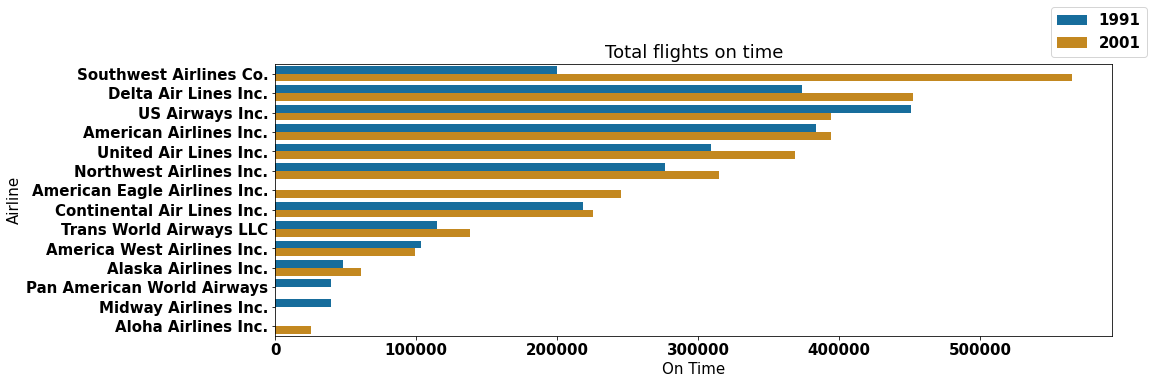

In [26]:
df_OnTimeCarriers = df_OnTimeCarriers.sort_values('OnTimeCount', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 5))
sns.color_palette("colorblind")
plt.title("Total flights on time")
ax= sns.barplot(x="OnTimeCount", y="AirlineName", hue="Year", palette="colorblind", data=df_OnTimeCarriers)
plt.xlabel("On Time")
plt.ylabel("Airline")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
#plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeCarriers_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

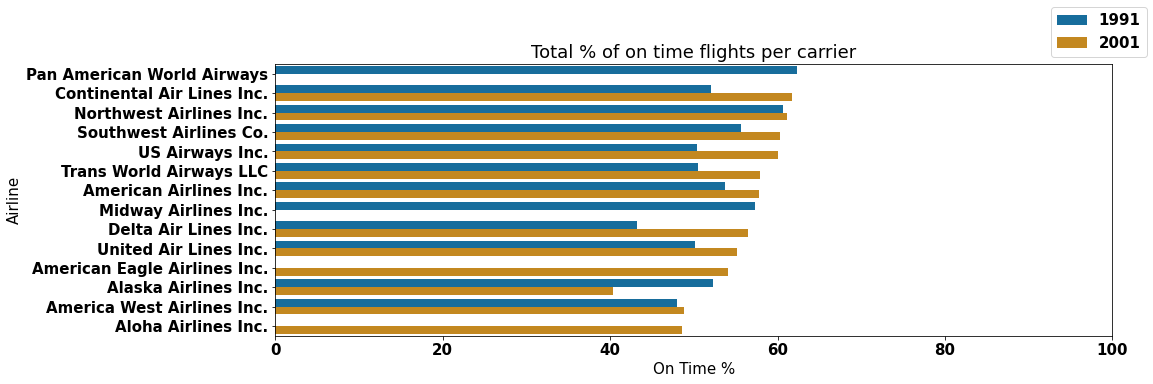

In [27]:
df_OnTimeCarriers = df_OnTimeCarriers.sort_values('OnTimePerc', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 5))
sns.color_palette("colorblind")
plt.title("Total % of on time flights per carrier")
ax= sns.barplot(x="OnTimePerc", y="AirlineName", hue="Year", palette="colorblind", data=df_OnTimeCarriers)
plt.xlabel("On Time %")
plt.ylabel("Airline")
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeCarriers_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

In [28]:
# function that extract statistical parameters from a grouby objet:
def get_stats_week(group):
    return {'WeekName': group.name, 'TotalCount': group.count(), 'OnTimeCount': group.sum(),
            'OnTimePerc': round(group.mean() * 100, 2)}

In [29]:
# Creation of a dataframe with statitical infos on each week for the year 1991
df_OnTimeWeek_1991 = df_1991['OnTime'].groupby(df_1991['DayOfWeek']).apply(get_stats_week).unstack()
df_OnTimeWeek_1991 = df_OnTimeWeek_1991.sort_values('OnTimeCount')
df_OnTimeWeek_1991['Year'] = 1991

df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([1], 'Monday')
df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([2], 'Tuesday')
df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([3], 'Wednesday')
df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([4], 'Thursday')
df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([5], 'Friday')
df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([6], 'Saturday')
df_OnTimeWeek_1991['WeekName']  = df_OnTimeWeek_1991['WeekName'] .replace([7], 'Sunday')

df_OnTimeWeek_1991

,WeekName,TotalCount,OnTimeCount,OnTimePerc,Year
DayOfWeek,,,,,
5,Friday,726211.0,342365.0,47.14,1991
4,Thursday,727625.0,346656.0,47.64,1991
6,Saturday,642431.0,358111.0,55.74,1991
3,Wednesday,732569.0,362290.0,49.45,1991
7,Sunday,684684.0,362682.0,52.97,1991
2,Tuesday,745361.0,392899.0,52.71,1991
1,Monday,736124.0,393216.0,53.42,1991


In [30]:
# Creation of a dataframe with statitical infos on each week for the year 2001
df_OnTimeWeek_2001 = df_2001['OnTime'].groupby(df_2001['DayOfWeek']).apply(get_stats_week).unstack()
df_OnTimeWeek_2001 = df_OnTimeWeek_2001.sort_values('OnTimeCount')
df_OnTimeWeek_2001['Year'] = 2001

df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([1], 'Monday')
df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([2], 'Tuesday')
df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([3], 'Wednesday')
df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([4], 'Thursday')
df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([5], 'Friday')
df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([6], 'Saturday')
df_OnTimeWeek_2001['WeekName']  = df_OnTimeWeek_2001['WeekName'] .replace([7], 'Sunday')

df_OnTimeWeek_2001

,WeekName,TotalCount,OnTimeCount,OnTimePerc,Year
DayOfWeek,,,,,
5,Friday,836054.0,430198.0,51.46,2001
4,Thursday,830330.0,441027.0,53.11,2001
6,Saturday,746911.0,456920.0,61.17,2001
7,Sunday,805349.0,464711.0,57.70,2001
3,Wednesday,827445.0,483054.0,58.38,2001
2,Tuesday,827109.0,499740.0,60.42,2001
1,Monday,850475.0,508360.0,59.77,2001


In [31]:
df_OnTimeWeek = pd.concat([df_OnTimeWeek_1991, df_OnTimeWeek_2001])
df_OnTimeWeek

,WeekName,TotalCount,OnTimeCount,OnTimePerc,Year
DayOfWeek,,,,,
5,Friday,726211.0,342365.0,47.14,1991
4,Thursday,727625.0,346656.0,47.64,1991
6,Saturday,642431.0,358111.0,55.74,1991
3,Wednesday,732569.0,362290.0,49.45,1991
7,Sunday,684684.0,362682.0,52.97,1991
2,Tuesday,745361.0,392899.0,52.71,1991
1,Monday,736124.0,393216.0,53.42,1991
5,Friday,836054.0,430198.0,51.46,2001
4,Thursday,830330.0,441027.0,53.11,2001


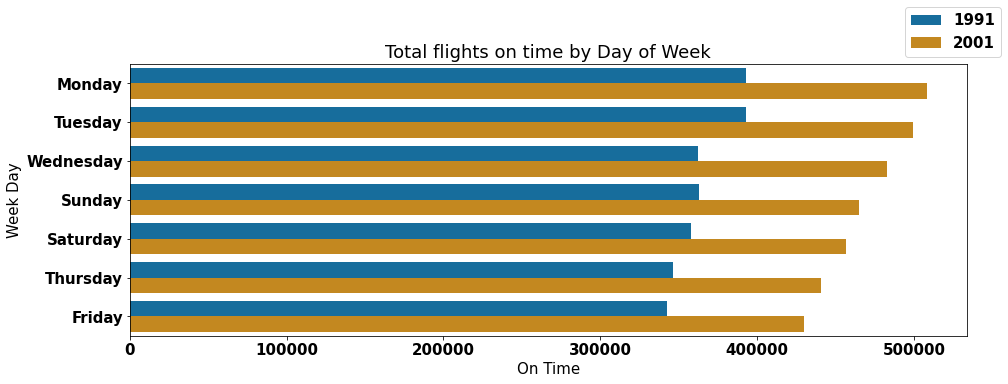

In [32]:
df_OnTimeWeek = df_OnTimeWeek.sort_values('OnTimeCount', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 5))
sns.color_palette("colorblind")
plt.title("Total flights on time by Day of Week")
ax= sns.barplot(x="OnTimeCount", y="WeekName", hue="Year", palette="colorblind", data=df_OnTimeWeek)
plt.xlabel("On Time")
plt.ylabel("Week Day")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
#plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeWeek_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

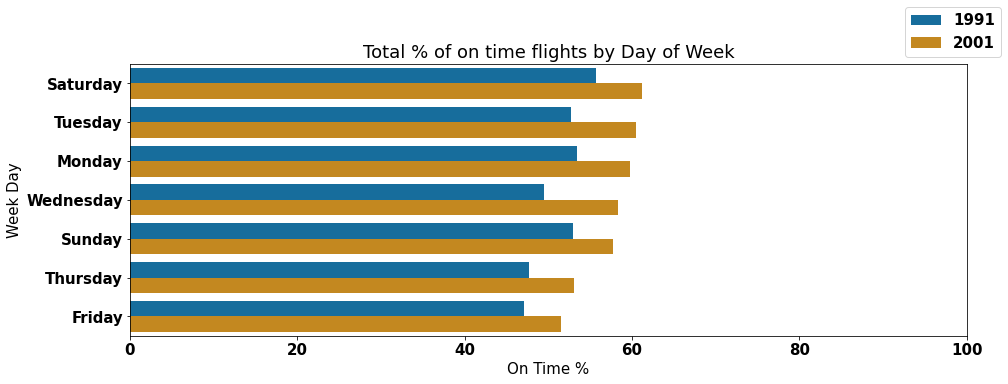

In [33]:
df_OnTimeWeek = df_OnTimeWeek.sort_values('OnTimePerc', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 5))
sns.color_palette("colorblind")
plt.title("Total % of on time flights by Day of Week")
ax= sns.barplot(x="OnTimePerc", y="WeekName", hue="Year", palette="colorblind", data=df_OnTimeWeek)
plt.xlabel("On Time %")
plt.ylabel("Week Day")
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeWeek_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

In [34]:
# function that extract statistical parameters from a grouby objet:
def get_stats_month(group):
    return {'MonthName': group.name, 'TotalCount': group.count(), 'OnTimeCount': group.sum(),
            'OnTimePerc': round(group.mean() * 100, 2)}

In [35]:
# Creation of a dataframe with statitical infos on each Month for the year 1991
df_OnTimeMonth_1991 = df_1991['OnTime'].groupby(df_1991['Month']).apply(get_stats_month).unstack()
df_OnTimeMonth_1991 = df_OnTimeMonth_1991.sort_values('OnTimeCount')
df_OnTimeMonth_1991['Year'] = 1991

df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([1], 'January')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([2], 'February')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([3], 'March')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([4], 'April')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([5], 'May')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([6], 'June')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([7], 'July')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([8], 'August')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([9], 'September')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([10], 'October')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([11], 'November')
df_OnTimeMonth_1991['MonthName']  = df_OnTimeMonth_1991['MonthName'] .replace([12], 'December')

df_OnTimeMonth_1991

,MonthName,TotalCount,OnTimeCount,OnTimePerc,Year
Month,,,,,
1,January,406145.0,178025.0,43.83,1991
2,February,370598.0,195721.0,52.81,1991
12,December,415182.0,200652.0,48.33,1991
11,November,396591.0,201685.0,50.85,1991
3,March,423936.0,211560.0,49.90,1991
4,April,417950.0,218420.0,52.26,1991
10,October,426815.0,218514.0,51.20,1991
8,August,438096.0,220612.0,50.36,1991
6,June,421434.0,224297.0,53.22,1991


In [36]:
# Creation of a dataframe with statitical infos on each Month for the year 2001
df_OnTimeMonth_2001 = df_2001['OnTime'].groupby(df_2001['Month']).apply(get_stats_month).unstack()
df_OnTimeMonth_2001 = df_OnTimeMonth_2001.sort_values('OnTimeCount')
df_OnTimeMonth_2001['Year'] = 2001

df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([1], 'January')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([2], 'February')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([3], 'March')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([4], 'April')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([5], 'May')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([6], 'June')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([7], 'July')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([8], 'August')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([9], 'September')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([10], 'October')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([11], 'November')
df_OnTimeMonth_2001['MonthName']  = df_OnTimeMonth_2001['MonthName'] .replace([12], 'December')

df_OnTimeMonth_2001

,MonthName,TotalCount,OnTimeCount,OnTimePerc,Year
Month,,,,,
2,February,458947.0,236154.0,51.46,2001
12,December,424931.0,238114.0,56.04,2001
11,November,412236.0,256160.0,62.14,2001
9,September,389988.0,260345.0,66.76,2001
6,June,503081.0,271010.0,53.87,2001
3,March,512325.0,272461.0,53.18,2001
1,January,509074.0,276051.0,54.23,2001
10,October,436189.0,281986.0,64.65,2001
4,April,501837.0,290229.0,57.83,2001


In [37]:
df_OnTimeMonth = pd.concat([df_OnTimeMonth_1991, df_OnTimeMonth_2001])
df_OnTimeMonth

,MonthName,TotalCount,OnTimeCount,OnTimePerc,Year
Month,,,,,
1,January,406145.0,178025.0,43.83,1991
2,February,370598.0,195721.0,52.81,1991
12,December,415182.0,200652.0,48.33,1991
11,November,396591.0,201685.0,50.85,1991
3,March,423936.0,211560.0,49.90,1991
4,April,417950.0,218420.0,52.26,1991
10,October,426815.0,218514.0,51.20,1991
8,August,438096.0,220612.0,50.36,1991
6,June,421434.0,224297.0,53.22,1991


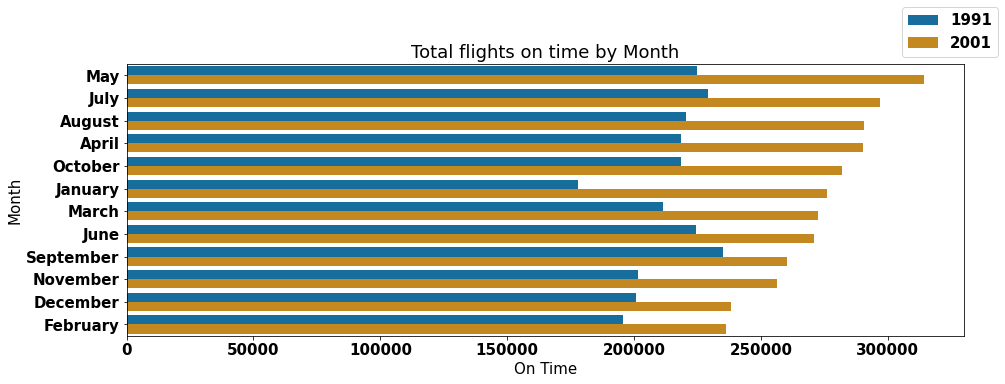

In [38]:
df_OnTimeMonth = df_OnTimeMonth.sort_values('OnTimeCount', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 5))
sns.color_palette("colorblind")
plt.title("Total flights on time by Month")
ax= sns.barplot(x="OnTimeCount", y="MonthName", hue="Year", palette="colorblind", data=df_OnTimeMonth)
plt.xlabel("On Time")
plt.ylabel("Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
#plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeMonth_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

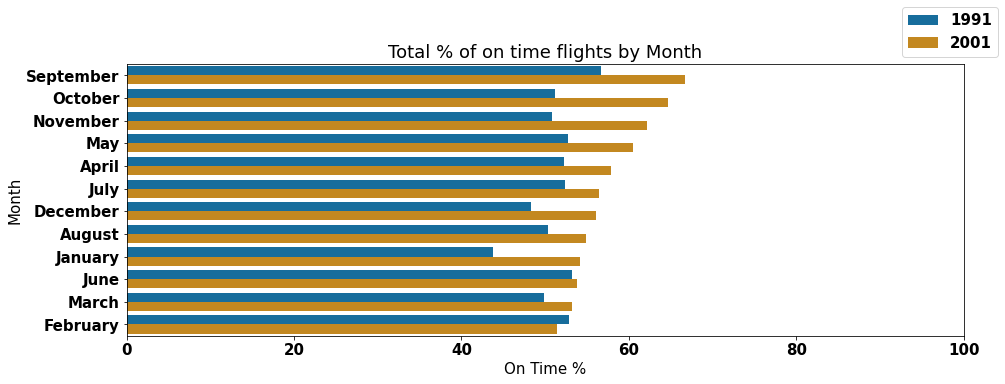

In [39]:
df_OnTimeMonth = df_OnTimeMonth.sort_values('OnTimePerc', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 5))
sns.color_palette("colorblind")
plt.title("Total % of on time flights by Month")
ax= sns.barplot(x="OnTimePerc", y="MonthName", hue="Year", palette="colorblind", data=df_OnTimeMonth)
plt.xlabel("On Time %")
plt.ylabel("Month")
plt.xlim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeMonth_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

In [40]:
# function that extract statistical parameters from a grouby objet:
def get_stats_airport(group):
    return {'AirportCode': group.name, 'AirportName': airports.loc[airports['iata'] == group.name, 'airport'].iloc[0],
            'TotalCount': group.count(), 'OnTimeCount': group.sum(), 'OnTimePerc': round(group.mean() * 100, 2)}

In [41]:
# Creation of a dataframe with statitical infos on each origin airport for the year 1991
df_OnTimeOriginAirport_1991 = df_1991['OnTime'].groupby(df_1991['Origin']).apply(get_stats_airport).unstack()
df_OnTimeOriginAirport_1991 = df_OnTimeOriginAirport_1991.sort_values('OnTimeCount')
df_OnTimeOriginAirport_1991['Year'] = 1991
df_OnTimeOriginAirport_1991

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year
Origin,,,,,,
SPI,SPI,Capital,28,8.0,28.57,1991
BQN,BQN,Rafael Hernandez,13,13.0,100.0,1991
GST,GST,Gustavus,81,30.0,37.04,1991
CCR,CCR,Buchanan,200,107.0,53.5,1991
EGE,EGE,Eagle County Regional,317,108.0,34.07,1991
TTN,TTN,Trenton-Mercer County,152,108.0,71.05,1991
GUC,GUC,Gunnison County,217,114.0,52.53,1991
EYW,EYW,Key West International,348,166.0,47.7,1991
EFD,EFD,Ellington,223,172.0,77.13,1991


In [42]:
# Creation of a dataframe with statitical infos on each origin airport for the year 2001
df_OnTimeOriginAirport_2001 = df_2001['OnTime'].groupby(df_2001['Origin']).apply(get_stats_airport).unstack()
df_OnTimeOriginAirport_2001 = df_OnTimeOriginAirport_2001.sort_values('OnTimeCount')
df_OnTimeOriginAirport_2001['Year'] = 2001
df_OnTimeOriginAirport_2001

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year
Origin,,,,,,
ACY,ACY,Atlantic City International,1,0.0,0.0,2001
RDR,RDR,Grand Forks AFB,46,42.0,91.3,2001
GST,GST,Gustavus,90,43.0,47.78,2001
LWB,LWB,Greenbrier Valley,75,48.0,64.0,2001
MAZ,MAZ,Eugenio Maria De Hostos,110,60.0,54.55,2001
DRO,DRO,Durango-La Plata County,132,68.0,51.52,2001
GUC,GUC,Gunnison County,224,135.0,60.27,2001
APF,APF,Naples Municipal,342,135.0,39.47,2001
AKN,AKN,King Salmon,268,147.0,54.85,2001


In [43]:
df_OnTimeOriginAirport = pd.concat([df_OnTimeOriginAirport_1991, df_OnTimeOriginAirport_2001])

df_OnTimeOriginAirport['OnTimeCount'] = pd.to_numeric(df_OnTimeOriginAirport['OnTimeCount'], errors='coerce')
df_OnTimeOriginAirport['OnTimePerc'] = pd.to_numeric(df_OnTimeOriginAirport['OnTimePerc'], errors='coerce')
df_OnTimeOriginAirport

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year
Origin,,,,,,
SPI,SPI,Capital,28,8.0,28.57,1991
BQN,BQN,Rafael Hernandez,13,13.0,100.00,1991
GST,GST,Gustavus,81,30.0,37.04,1991
CCR,CCR,Buchanan,200,107.0,53.50,1991
EGE,EGE,Eagle County Regional,317,108.0,34.07,1991
TTN,TTN,Trenton-Mercer County,152,108.0,71.05,1991
GUC,GUC,Gunnison County,217,114.0,52.53,1991
EYW,EYW,Key West International,348,166.0,47.70,1991
EFD,EFD,Ellington,223,172.0,77.13,1991


In [44]:
threshold = 25000

df_OnTimeOriginAirport['OnTimeCountAirport'] = df_OnTimeOriginAirport.groupby('AirportCode')['OnTimeCount'].transform('sum')
df_OnTimeOriginAirport = df_OnTimeOriginAirport.sort_values('AirportCode')
df_OnTimeOriginAirport = df_OnTimeOriginAirport[df_OnTimeOriginAirport['OnTimeCountAirport'] >= threshold]

df_OnTimeOriginAirport

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year,OnTimeCountAirport
Origin,,,,,,,
ABQ,ABQ,Albuquerque International,35463,21830.0,61.56,2001,37203.0
ABQ,ABQ,Albuquerque International,30073,15373.0,51.12,1991,37203.0
ATL,ATL,William B Hartsfield-Atlanta Intl,187174,74476.0,39.79,1991,200087.0
ATL,ATL,William B Hartsfield-Atlanta Intl,241478,125611.0,52.02,2001,200087.0
AUS,AUS,Austin-Bergstrom International,29146,15869.0,54.45,1991,42849.0
AUS,AUS,Austin-Bergstrom International,41673,26980.0,64.74,2001,42849.0
BDL,BDL,Bradley International,34583,21228.0,61.38,2001,36974.0
BDL,BDL,Bradley International,28588,15746.0,55.08,1991,36974.0
BNA,BNA,Nashville International,61060,30590.0,50.10,1991,65452.0


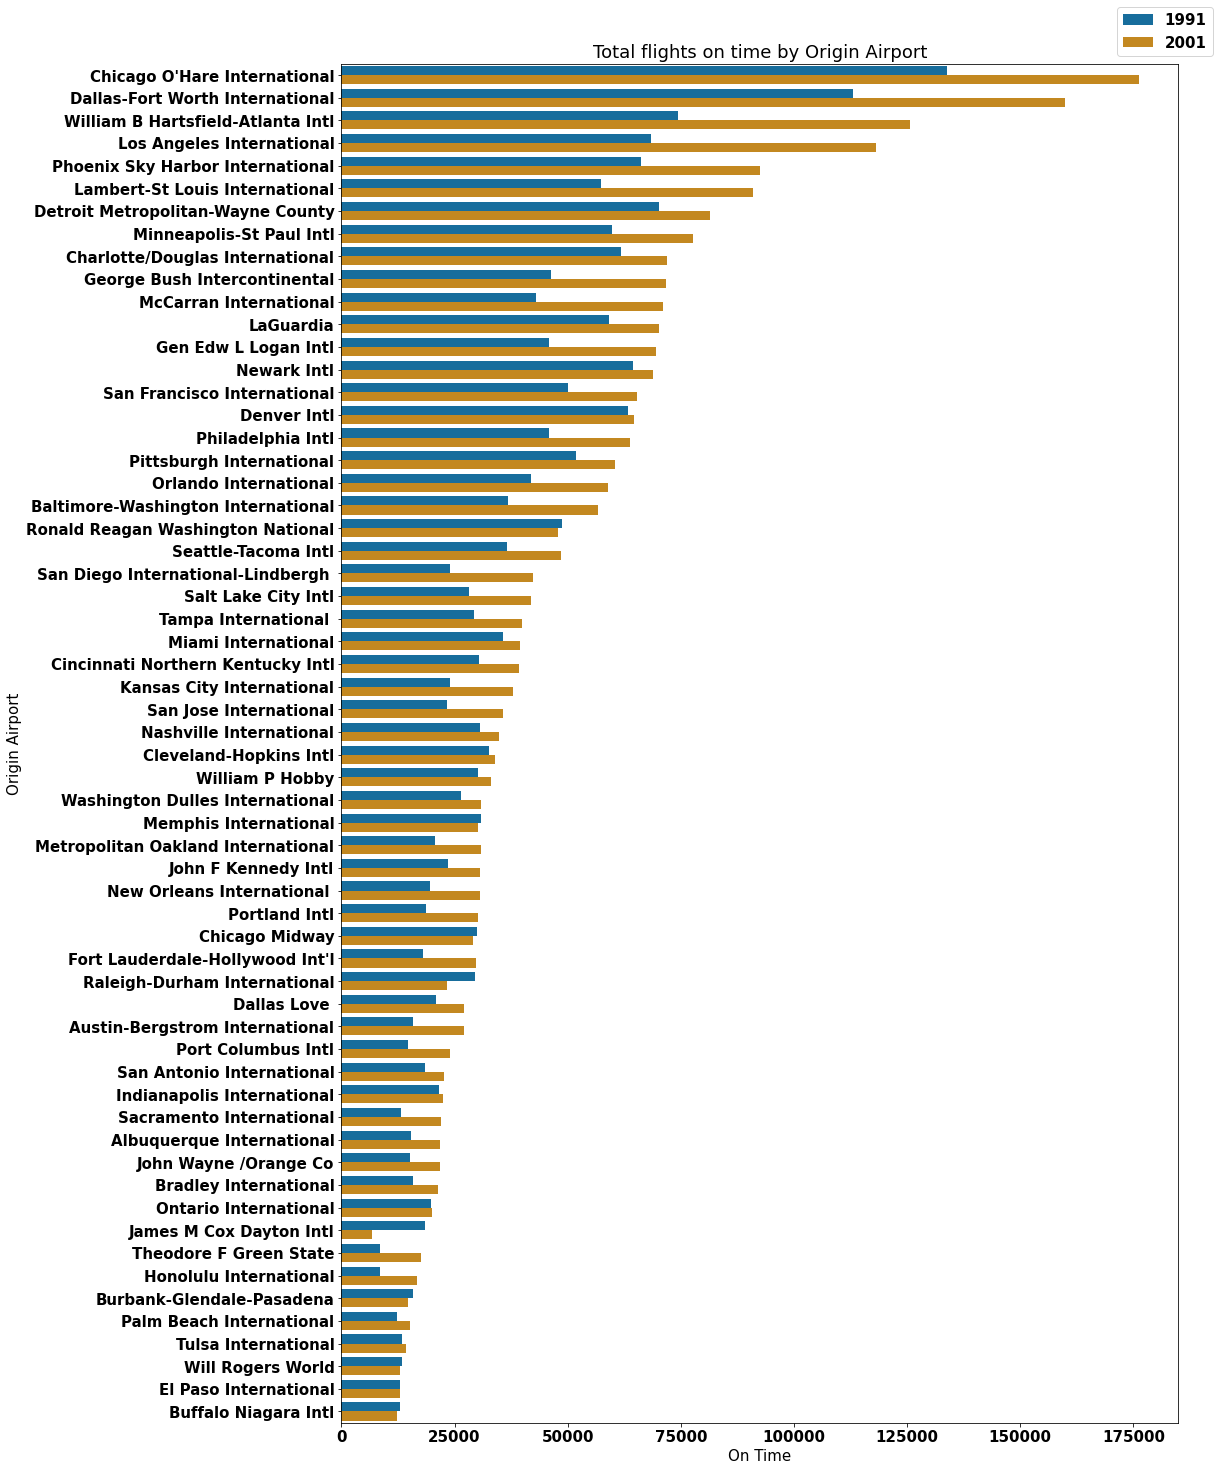

In [45]:
df_OnTimeOriginAirport = df_OnTimeOriginAirport.sort_values('OnTimeCount', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 25))
sns.color_palette("colorblind")
plt.title("Total flights on time by Origin Airport")
ax= sns.barplot(x="OnTimeCount", y="AirportName", hue="Year", palette="colorblind", data=df_OnTimeOriginAirport) #.nlargest(20, 'OnTimeCount'))
plt.xlabel("On Time")
plt.ylabel("Origin Airport")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
#plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeOriginAirport_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

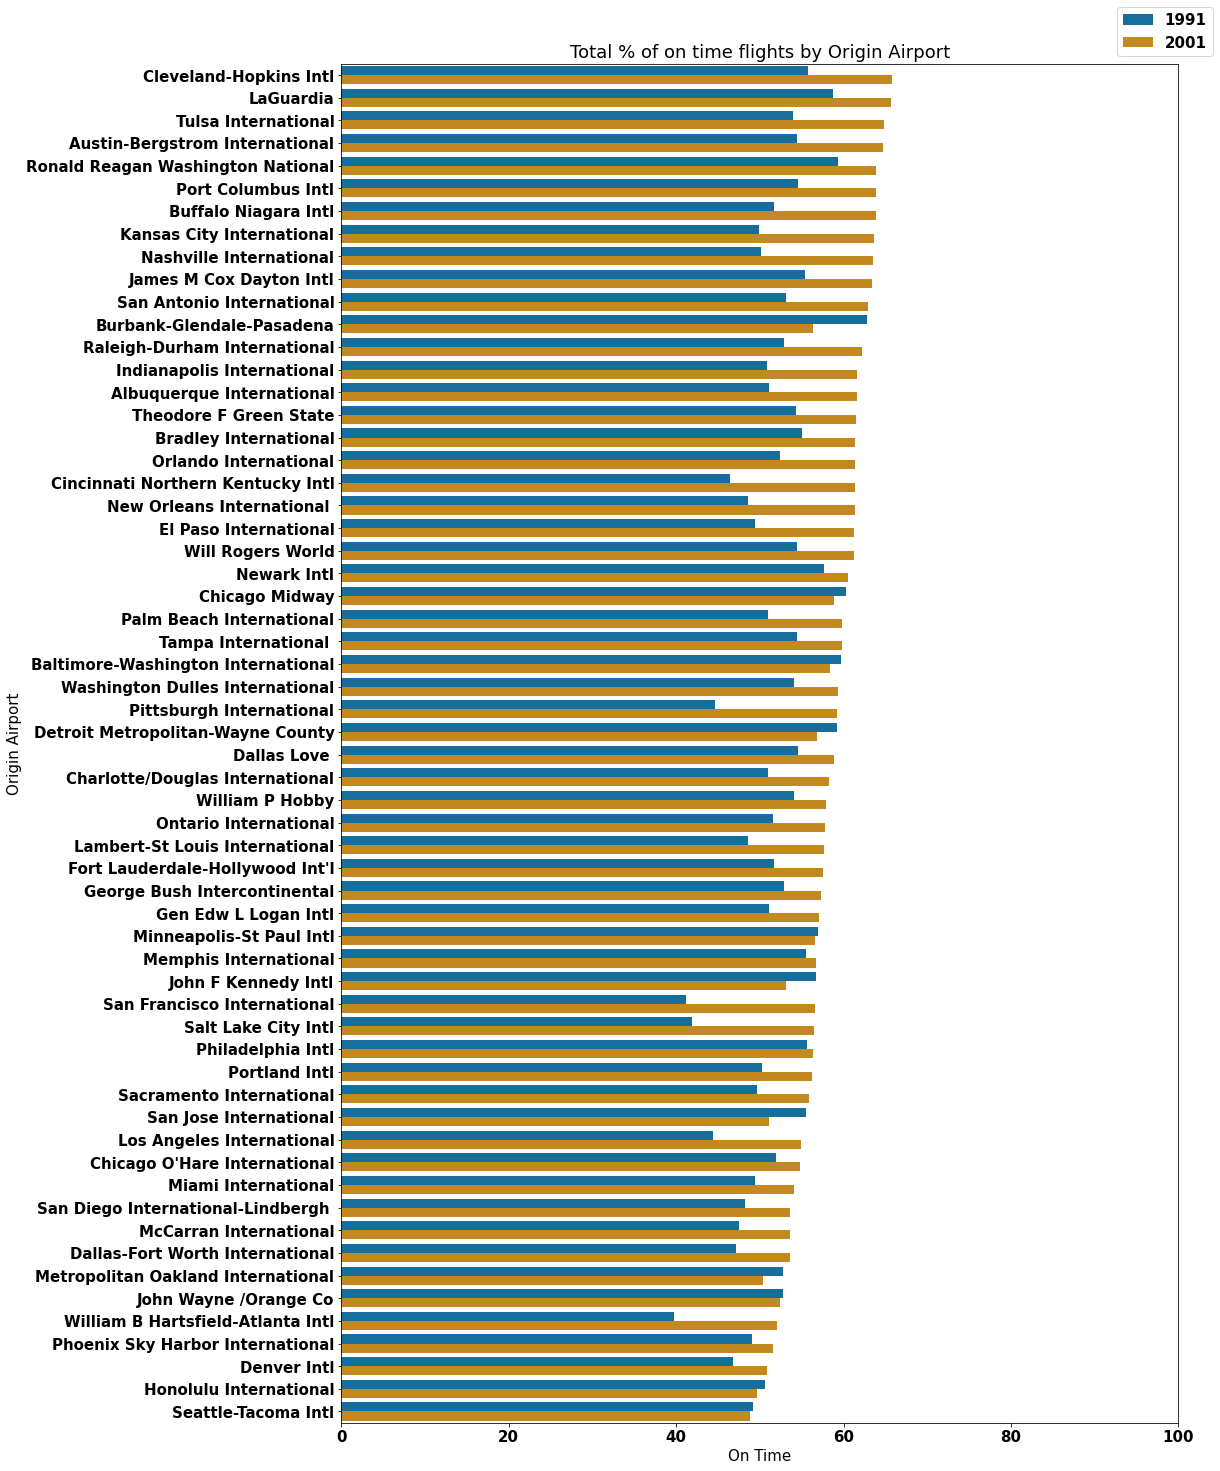

In [46]:
df_OnTimeOriginAirport = df_OnTimeOriginAirport.sort_values('OnTimePerc', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 25))
sns.color_palette("colorblind")
plt.title("Total % of on time flights by Origin Airport")
ax= sns.barplot(x="OnTimePerc", y="AirportName", hue="Year", palette="colorblind", data=df_OnTimeOriginAirport) #.nlargest(20, 'OnTimeCount'))
plt.xlabel("On Time")
plt.ylabel("Origin Airport")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeOriginAirport_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

In [47]:
# Creation of a dataframe with statitical infos on each Destination airport for the year 1991
df_OnTimeDestAirport_1991 = df_1991['OnTime'].groupby(df_1991['Dest']).apply(get_stats_airport).unstack()
df_OnTimeDestAirport_1991 = df_OnTimeDestAirport_1991.sort_values('OnTimeCount')
df_OnTimeDestAirport_1991['Year'] = 1991
df_OnTimeDestAirport_1991

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year
Dest,,,,,,
BQN,BQN,Rafael Hernandez,14,13.0,92.86,1991
SPI,SPI,Capital,29,18.0,62.07,1991
GST,GST,Gustavus,79,21.0,26.58,1991
TTN,TTN,Trenton-Mercer County,149,63.0,42.28,1991
GUC,GUC,Gunnison County,209,108.0,51.67,1991
CCR,CCR,Buchanan,195,127.0,65.13,1991
EFD,EFD,Ellington,226,161.0,71.24,1991
ROR,ROR,Babelthoup/Koror,360,165.0,45.83,1991
TVL,TVL,Lake Tahoe,233,181.0,77.68,1991


In [48]:
# Creation of a dataframe with statitical infos on each Destination airport for the year 2001
df_OnTimeDestAirport_2001 = df_2001['OnTime'].groupby(df_2001['Dest']).apply(get_stats_airport).unstack()
df_OnTimeDestAirport_2001 = df_OnTimeDestAirport_2001.sort_values('OnTimeCount')
df_OnTimeDestAirport_2001['Year'] = 2001
df_OnTimeDestAirport_2001

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year
Dest,,,,,,
MAZ,MAZ,Eugenio Maria De Hostos,55,15.0,27.27,2001
RDR,RDR,Grand Forks AFB,46,22.0,47.83,2001
GST,GST,Gustavus,90,40.0,44.44,2001
LWB,LWB,Greenbrier Valley,75,50.0,66.67,2001
DRO,DRO,Durango-La Plata County,133,75.0,56.39,2001
GUC,GUC,Gunnison County,225,91.0,40.44,2001
BQN,BQN,Rafael Hernandez,251,116.0,46.22,2001
AKN,AKN,King Salmon,268,128.0,47.76,2001
BRO,BRO,Brownsville/S.Padre Island International,248,129.0,52.02,2001


In [49]:
df_OnTimeDestAirport = pd.concat([df_OnTimeDestAirport_1991, df_OnTimeDestAirport_2001])

df_OnTimeDestAirport['OnTimeCount'] = pd.to_numeric(df_OnTimeDestAirport['OnTimeCount'], errors='coerce')
df_OnTimeDestAirport['OnTimePerc'] = pd.to_numeric(df_OnTimeDestAirport['OnTimePerc'], errors='coerce')
df_OnTimeDestAirport

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year
Dest,,,,,,
BQN,BQN,Rafael Hernandez,14,13.0,92.86,1991
SPI,SPI,Capital,29,18.0,62.07,1991
GST,GST,Gustavus,79,21.0,26.58,1991
TTN,TTN,Trenton-Mercer County,149,63.0,42.28,1991
GUC,GUC,Gunnison County,209,108.0,51.67,1991
CCR,CCR,Buchanan,195,127.0,65.13,1991
EFD,EFD,Ellington,226,161.0,71.24,1991
ROR,ROR,Babelthoup/Koror,360,165.0,45.83,1991
TVL,TVL,Lake Tahoe,233,181.0,77.68,1991


In [50]:
df_OnTimeDestAirport['OnTimeCountAirport'] = df_OnTimeDestAirport.groupby('AirportCode')['OnTimeCount'].transform('sum')
df_OnTimeDestAirport = df_OnTimeDestAirport.sort_values('AirportCode')
df_OnTimeDestAirport = df_OnTimeDestAirport[df_OnTimeDestAirport['OnTimeCountAirport'] >= threshold]

df_OnTimeDestAirport

,AirportCode,AirportName,TotalCount,OnTimeCount,OnTimePerc,Year,OnTimeCountAirport
Dest,,,,,,,
ABQ,ABQ,Albuquerque International,35512,20571.0,57.93,2001,34428.0
ABQ,ABQ,Albuquerque International,29714,13857.0,46.63,1991,34428.0
ATL,ATL,William B Hartsfield-Atlanta Intl,186667,83614.0,44.79,1991,222372.0
ATL,ATL,William B Hartsfield-Atlanta Intl,240598,138758.0,57.67,2001,222372.0
AUS,AUS,Austin-Bergstrom International,41740,24888.0,59.63,2001,40670.0
AUS,AUS,Austin-Bergstrom International,28748,15782.0,54.90,1991,40670.0
BDL,BDL,Bradley International,28237,14322.0,50.72,1991,34252.0
BDL,BDL,Bradley International,34722,19930.0,57.40,2001,34252.0
BNA,BNA,Nashville International,61613,33839.0,54.92,1991,67991.0


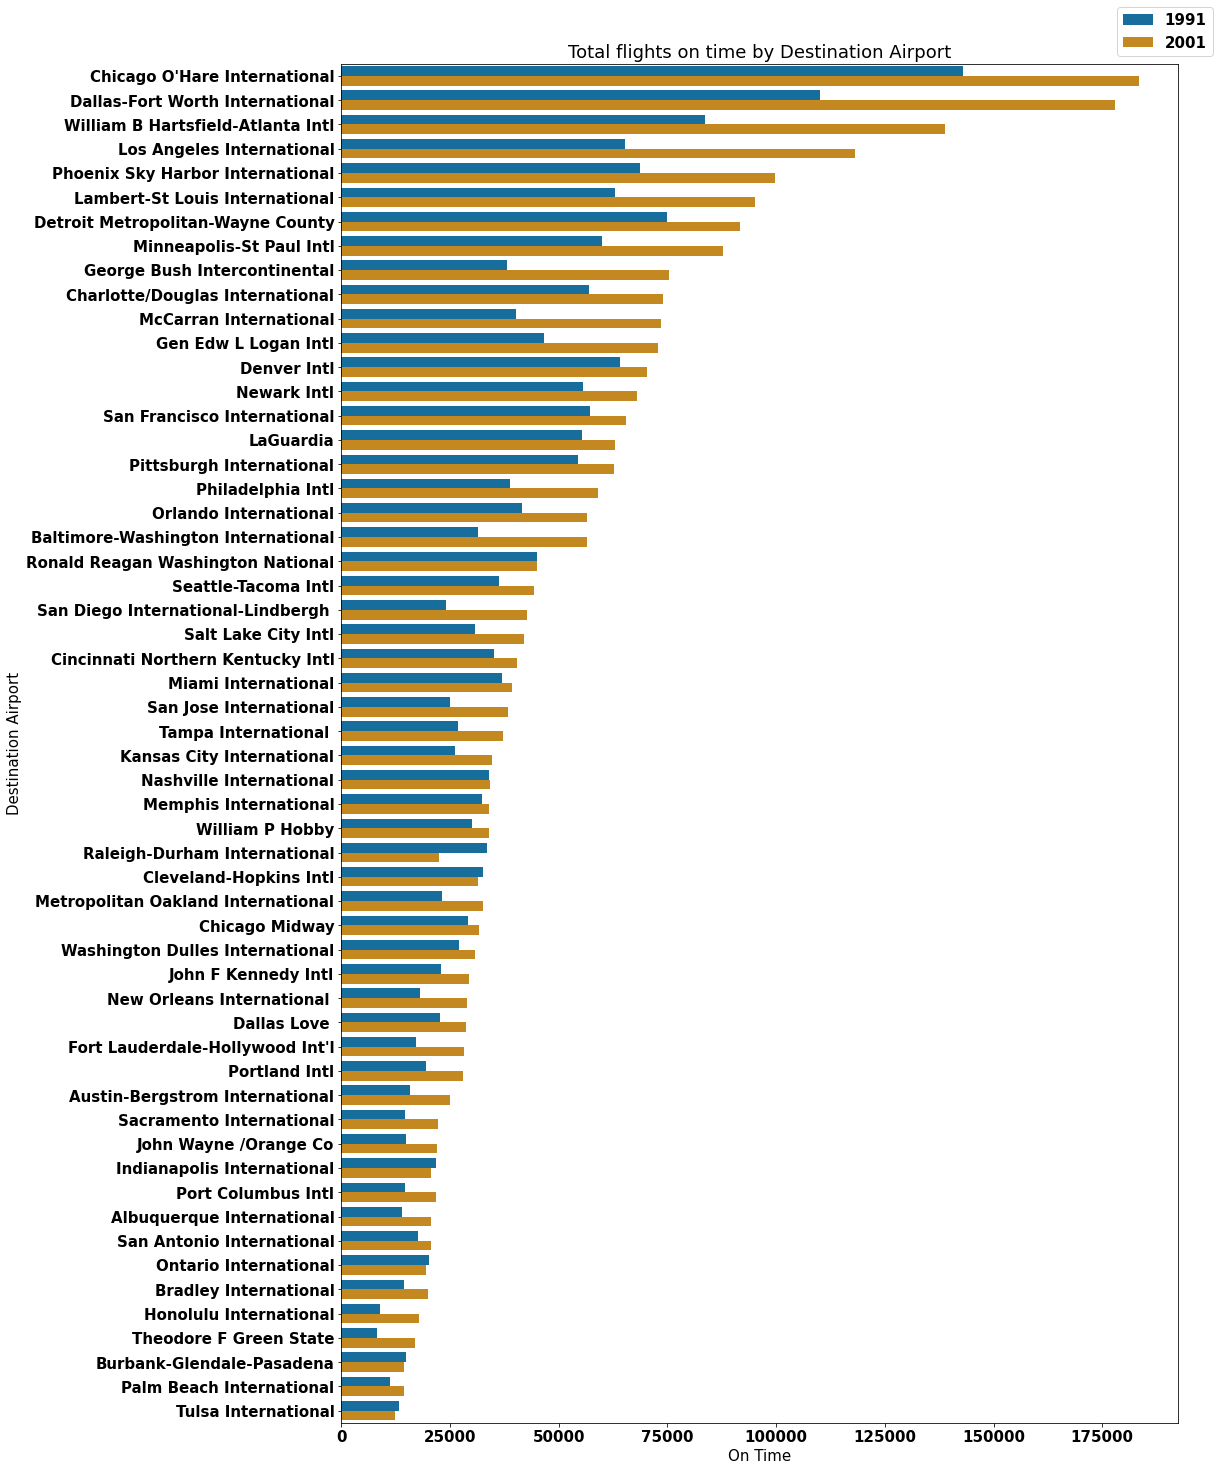

In [51]:
df_OnTimeDestAirport = df_OnTimeDestAirport.sort_values('OnTimeCount', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 25))
sns.color_palette("colorblind")
plt.title("Total flights on time by Destination Airport")
ax= sns.barplot(x="OnTimeCount", y="AirportName", hue="Year", palette="colorblind", data=df_OnTimeDestAirport) #.nlargest(20, 'OnTimeCount'))
plt.xlabel("On Time")
plt.ylabel("Destination Airport")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
#plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeDestAirport_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

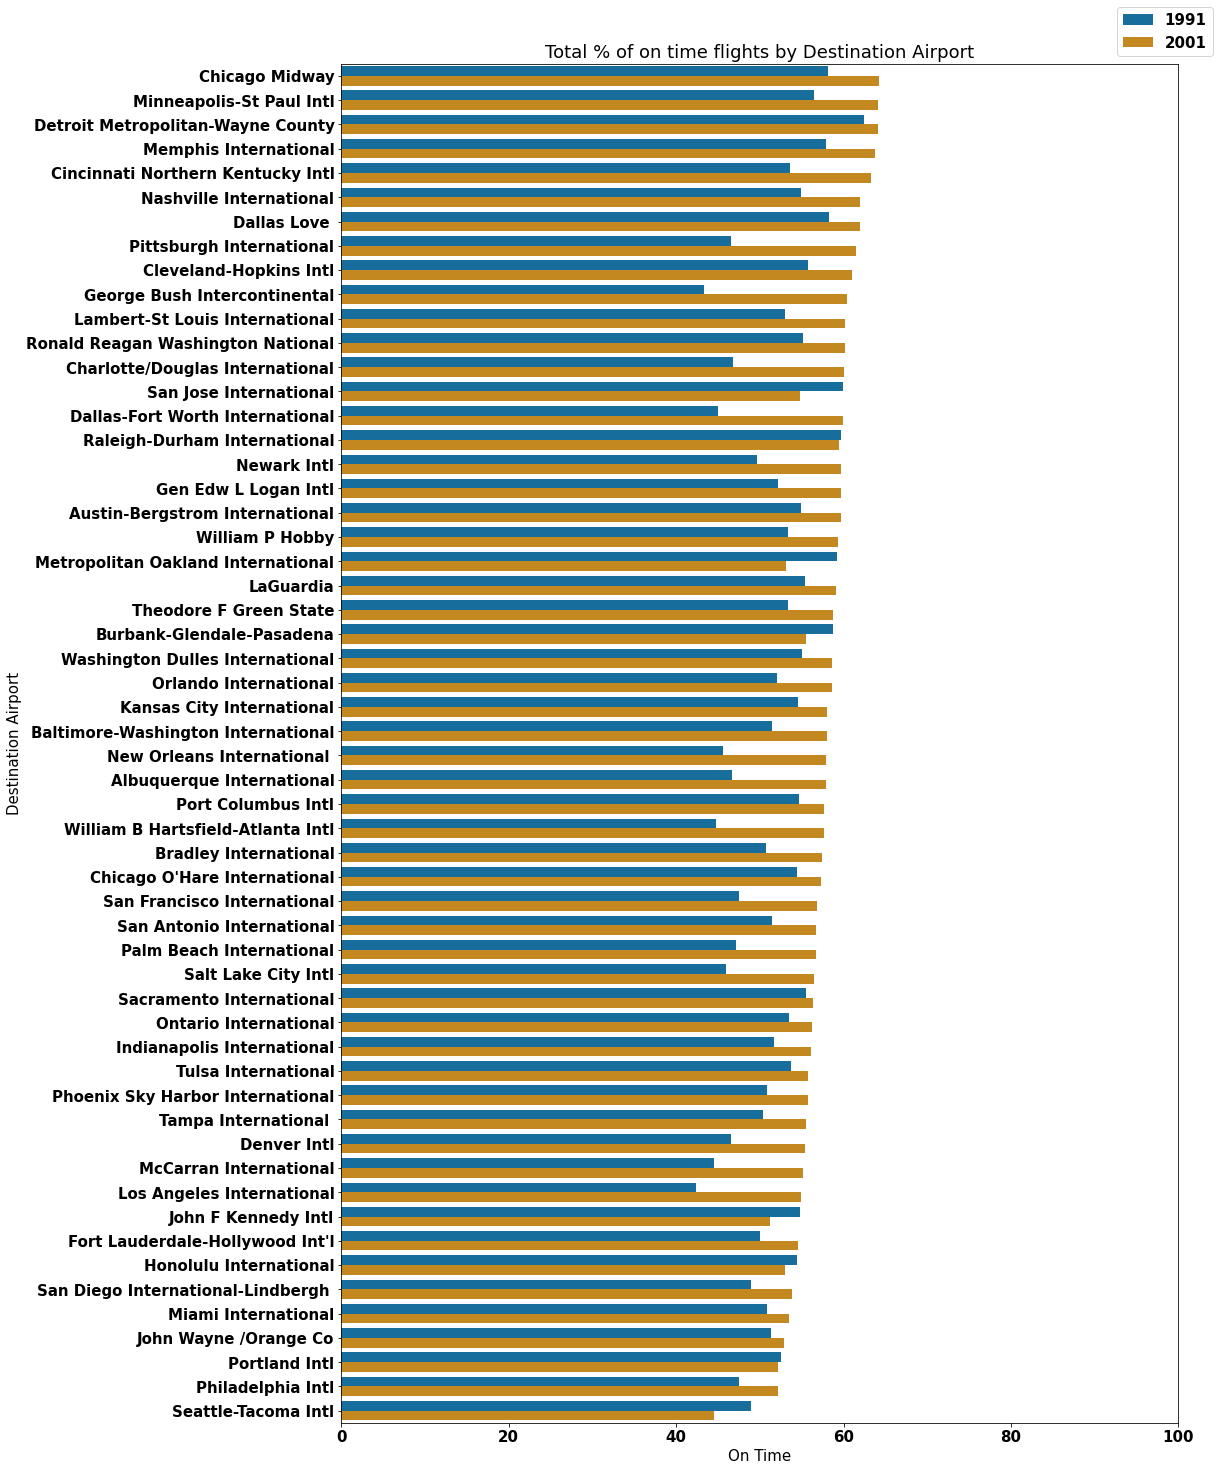

In [52]:
df_OnTimeDestAirport = df_OnTimeDestAirport.sort_values('OnTimePerc', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(15, 25))
sns.color_palette("colorblind")
plt.title("Total % of on time flights by Destination Airport")
ax= sns.barplot(x="OnTimePerc", y="AirportName", hue="Year", palette="colorblind", data=df_OnTimeDestAirport) #.nlargest(20, 'OnTimeCount'))
plt.xlabel("On Time")
plt.ylabel("Destination Airport")
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
plt.xlim(0, 100)

# Display values on the right side of the bars
#for index, value in enumerate(df_OnTimeDestAirport_1991['OnTimePerc']):
 #   ax.text(index, value, str(value), ha='left', va='top')
    
plt.show()

In [53]:
df_OnTimeTotal = pd.DataFrame()

df_OnTimeTotal['TotalFlights'] = [df_1991['OnTime'].count()]
df_OnTimeTotal['TotalOnTime'] = [df_1991['OnTime'].sum()]
df_OnTimeTotal['TotalOnTimePerc'] = round(df_1991['OnTime'].sum()/df_1991['OnTime'].count() * 100, 2)
df_OnTimeTotal['Year'] = '1991'

OnTimeTotal2001 = {'TotalFlights': df_2001['OnTime'].count(), 'TotalOnTime': df_2001['OnTime'].sum(), 
                   'TotalOnTimePerc': round(df_2001['OnTime'].sum()/df_2001['OnTime'].count() * 100, 2), 'Year':'2001'}
df_OnTimeTotal = df_OnTimeTotal.append(OnTimeTotal2001, ignore_index=True) 
df_OnTimeTotal                                                                              

,TotalFlights,TotalOnTime,TotalOnTimePerc,Year
0,4995005,2558219.0,51.22,1991
1,5723673,3284010.0,57.38,2001


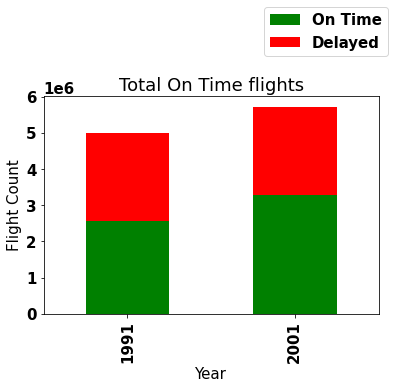

In [54]:
df_OnTimeTotal['TotalDelayed'] = df_OnTimeTotal['TotalFlights'] - df_OnTimeTotal['TotalOnTime']

# Plotting
ax = df_OnTimeTotal.plot(x='Year', y=['TotalOnTime', 'TotalDelayed'], kind='bar', stacked=True, color=['green', 'red'])

# Adding labels and title
ax.set_ylabel('Flight Count')
ax.set_xlabel('Year')
ax.set_title('Total On Time flights')

# Adding legend
ax.legend(["On Time", "Delayed"], bbox_to_anchor=(1.05, 1.15), loc='lower right')

# Show the plot
plt.show()

# Flight Cancellation Prediction

In [55]:
"""""
# Function for one hot encoding
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df
"""""

'""\n# Function for one hot encoding\ndef onehot_encode(df, column_dict):\n    df = df.copy()\n    for column, prefix in column_dict.items():\n        dummies = pd.get_dummies(df[column], prefix=prefix)\n        df = pd.concat([df, dummies], axis=1)\n        df = df.drop(column, axis=1)\n    return df\n'

In [56]:
df_flights = pd.concat([df_1991, df_2001])

In [57]:
# Get the correlation
corr = round(df_flights.corr(), 2)
corr

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,OnTime
Year,1.00,-0.04,-0.00,0.01,0.00,-0.00,-0.00,0.00,0.10,0.11,0.01,0.05,0.08,0.06
Month,-0.04,1.00,0.01,0.01,-0.01,-0.01,0.00,-0.00,-0.01,-0.00,-0.04,-0.03,0.01,0.03
DayofMonth,-0.00,0.01,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
DayOfWeek,0.01,0.01,-0.00,1.00,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.03,0.01,-0.01
DepTime,0.00,-0.01,-0.00,0.01,1.00,0.98,0.74,0.78,-0.04,-0.04,0.13,0.15,-0.04,-0.08
CRSDepTime,-0.00,-0.01,-0.00,0.00,0.98,1.00,0.73,0.78,-0.04,-0.04,0.09,0.11,-0.04,-0.06
ArrTime,-0.00,0.00,-0.00,0.01,0.74,0.73,1.00,0.92,0.05,0.05,0.06,0.07,0.04,-0.07
CRSArrTime,0.00,-0.00,-0.00,0.01,0.78,0.78,0.92,1.00,0.06,0.06,0.09,0.10,0.05,-0.06
ActualElapsedTime,0.10,-0.01,0.00,0.01,-0.04,-0.04,0.05,0.06,1.00,0.98,0.09,0.04,0.97,-0.10
CRSElapsedTime,0.11,-0.00,0.00,0.01,-0.04,-0.04,0.05,0.06,0.98,1.00,-0.00,0.04,0.98,-0.01


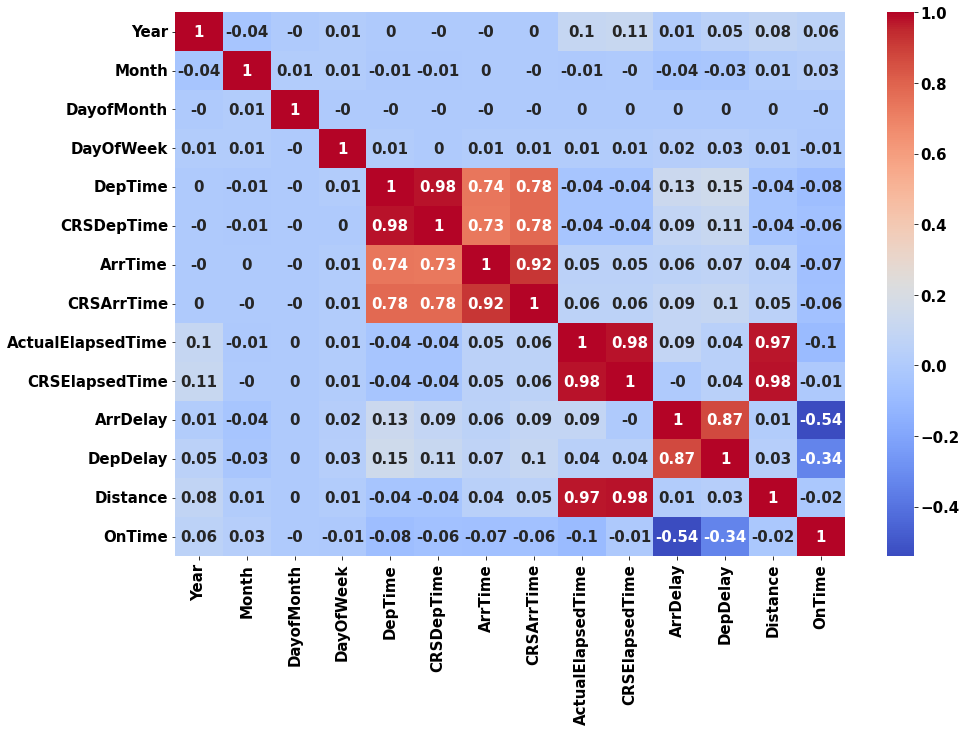

In [58]:
# Plotting the correlation in heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [59]:
#df_flights = df_flights.drop(['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance', 'DepDelay'], axis=1)
#df_flights = df_flights.drop(['Year', 'Month'], axis=1)

df_flights = df_flights.drop(['ArrDelay', 'DepDelay'], axis=1)

# label encoding nominal feature columns
labelencoder = LabelEncoder()

df_flights.UniqueCarrier = labelencoder.fit_transform(df_flights.UniqueCarrier)
df_flights.Origin = labelencoder.fit_transform(df_flights.Origin)
df_flights.Dest = labelencoder.fit_transform(df_flights.Dest)

"""""
df_flights = onehot_encode(
    df_flights,
    column_dict={
        'UniqueCarrier': 'AL'#,
        #'Origin': 'OA',
        #'Dest': 'DA'
    }
)
"""""

df_flights.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Origin,Dest,Distance,OnTime
0,1991,1,1,2,1709.0,1705,1944.0,1944,12,155.0,159,247,244,1104.0,1.0
1,1991,1,2,3,1704.0,1705,1946.0,1944,12,162.0,159,247,244,1104.0,0.0
2,1991,1,3,4,1705.0,1705,1934.0,1944,12,149.0,159,247,244,1104.0,1.0
3,1991,1,4,5,1709.0,1705,1951.0,1944,12,162.0,159,247,244,1104.0,0.0
4,1991,1,5,6,1703.0,1705,1936.0,1944,12,153.0,159,247,244,1104.0,1.0


# Splitting Train and Test data

In [60]:
# Function for splitting into Train and Test data
def split_data(df):
    y = df['OnTime'].copy()
    X = df.drop('OnTime', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=61)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
   
    return X_train, X_test, y_train, y_test

In [61]:
X_train, X_test, y_train, y_test = split_data(df_flights)

In [62]:
X_train.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Origin,Dest,Distance
0,0.934233,-1.296724,-0.762433,0.532256,-1.659890,-1.575714,-1.507053,-1.567741,1.053622,-0.246164,-0.449016,0.404856,0.835968,-0.731124
1,0.934233,1.351723,0.146447,1.033710,0.198907,0.228092,0.240003,0.236025,0.608579,0.426670,0.313255,-1.302014,1.474449,0.077707
2,-1.070396,0.174635,-0.535213,0.030802,-1.133579,-1.134312,-0.743215,-0.759932,-1.616640,0.207268,0.239960,-0.913458,-1.121114,0.421506
3,-1.070396,1.057451,-1.671312,-0.972107,-0.490310,-0.482819,-0.663440,-0.692444,1.053622,-1.079892,-1.137992,1.556647,1.585489,-0.893976
4,-1.070396,1.351723,-1.557702,1.033710,-0.427654,-0.421278,-0.180806,-0.281382,-1.616640,1.143384,1.090185,0.724027,1.377289,1.004154


In [63]:
y_train.head(5)

539589     0.0
5252461    1.0
2874241    1.0
3855080    0.0
4600195    0.0
Name: OnTime, dtype: float64

In [64]:
y_train.value_counts()

1.0    4088933
0.0    3414141
Name: OnTime, dtype: int64

# Build the Model 

In [65]:
# Building the model with logistics regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate the Model

In [84]:
# Function for evaluating the model
def evaluate_model(model, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Test Accuracy: {:.2f}%".format(model_acc * 100))
    
    y_true = np.array(y_test)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=["Delayed", "On Time"])
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2) + 0.5, ["Delayed", "On Time"])
    plt.yticks(np.arange(2) + 0.5, ["Delayed", "On Time"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Test Accuracy: 85.63%


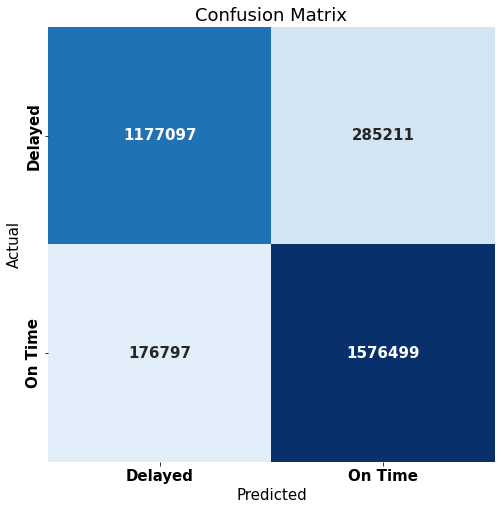

Classification Report:
----------------------
               precision    recall  f1-score   support

     Delayed       0.87      0.80      0.84   1462308
     On Time       0.85      0.90      0.87   1753296

    accuracy                           0.86   3215604
   macro avg       0.86      0.85      0.85   3215604
weighted avg       0.86      0.86      0.86   3215604



In [85]:
evaluate_model(model, X_test, y_test)